# Python Libraries

In [292]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import os

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, make_scorer, classification_report
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('always')  

# Read and Analyse Data

In [293]:
dataset_path = os.path.join("..", "dataset", "water_potability.csv")
df = pd.read_csv(dataset_path)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [294]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## Dependent Variable Analysis

In [295]:
p=df['Potability'].value_counts()
print(p)

0    1998
1    1278
Name: Potability, dtype: int64


## Correlation Between Features

In [296]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


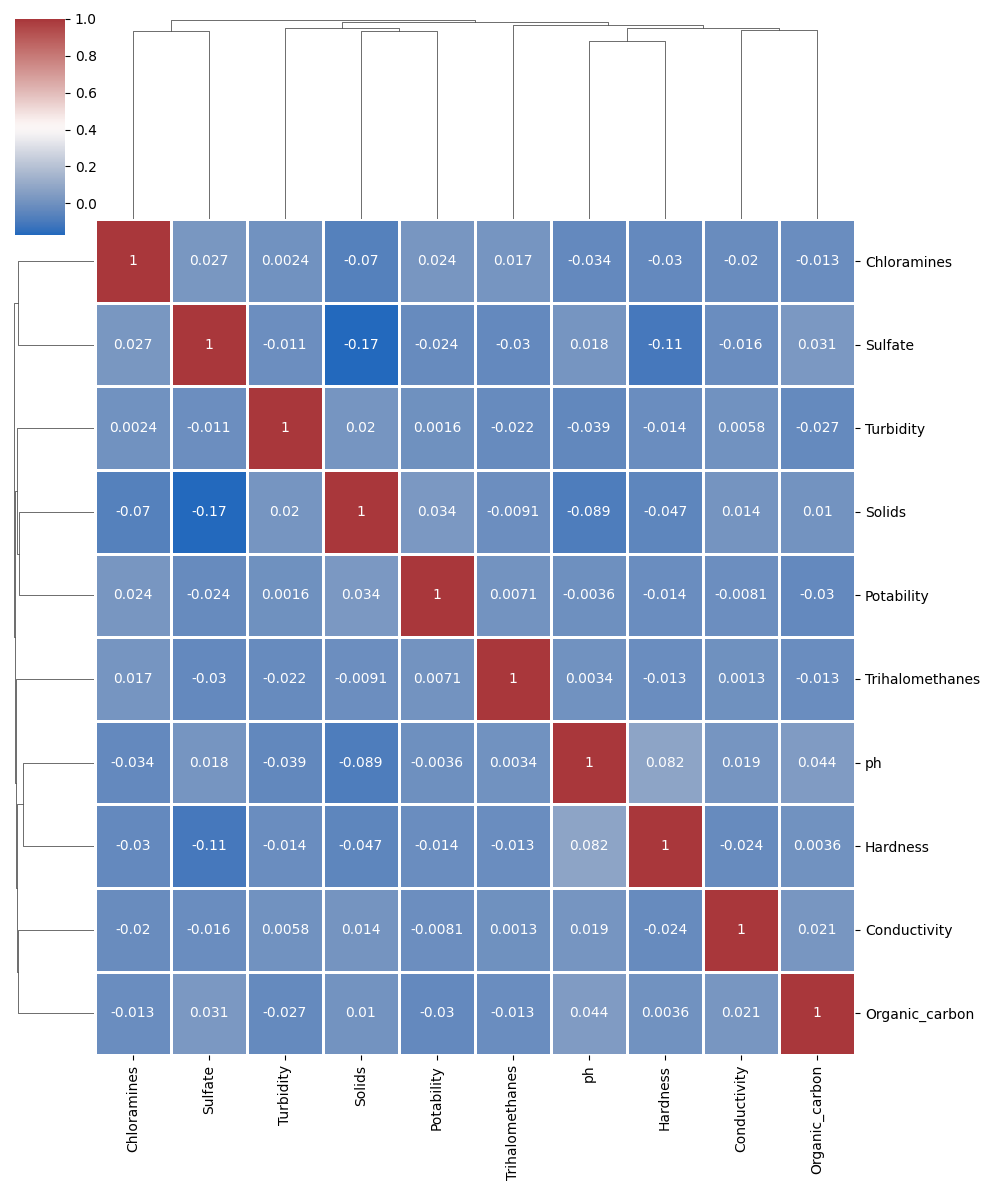

In [297]:
sns.clustermap(df.corr(),cmap="vlag",dendrogram_ratio=(0.1,0.2),\
              annot = True, linewidths = 1, figsize=(10,12))
plt.show();

## Distubituion of Features

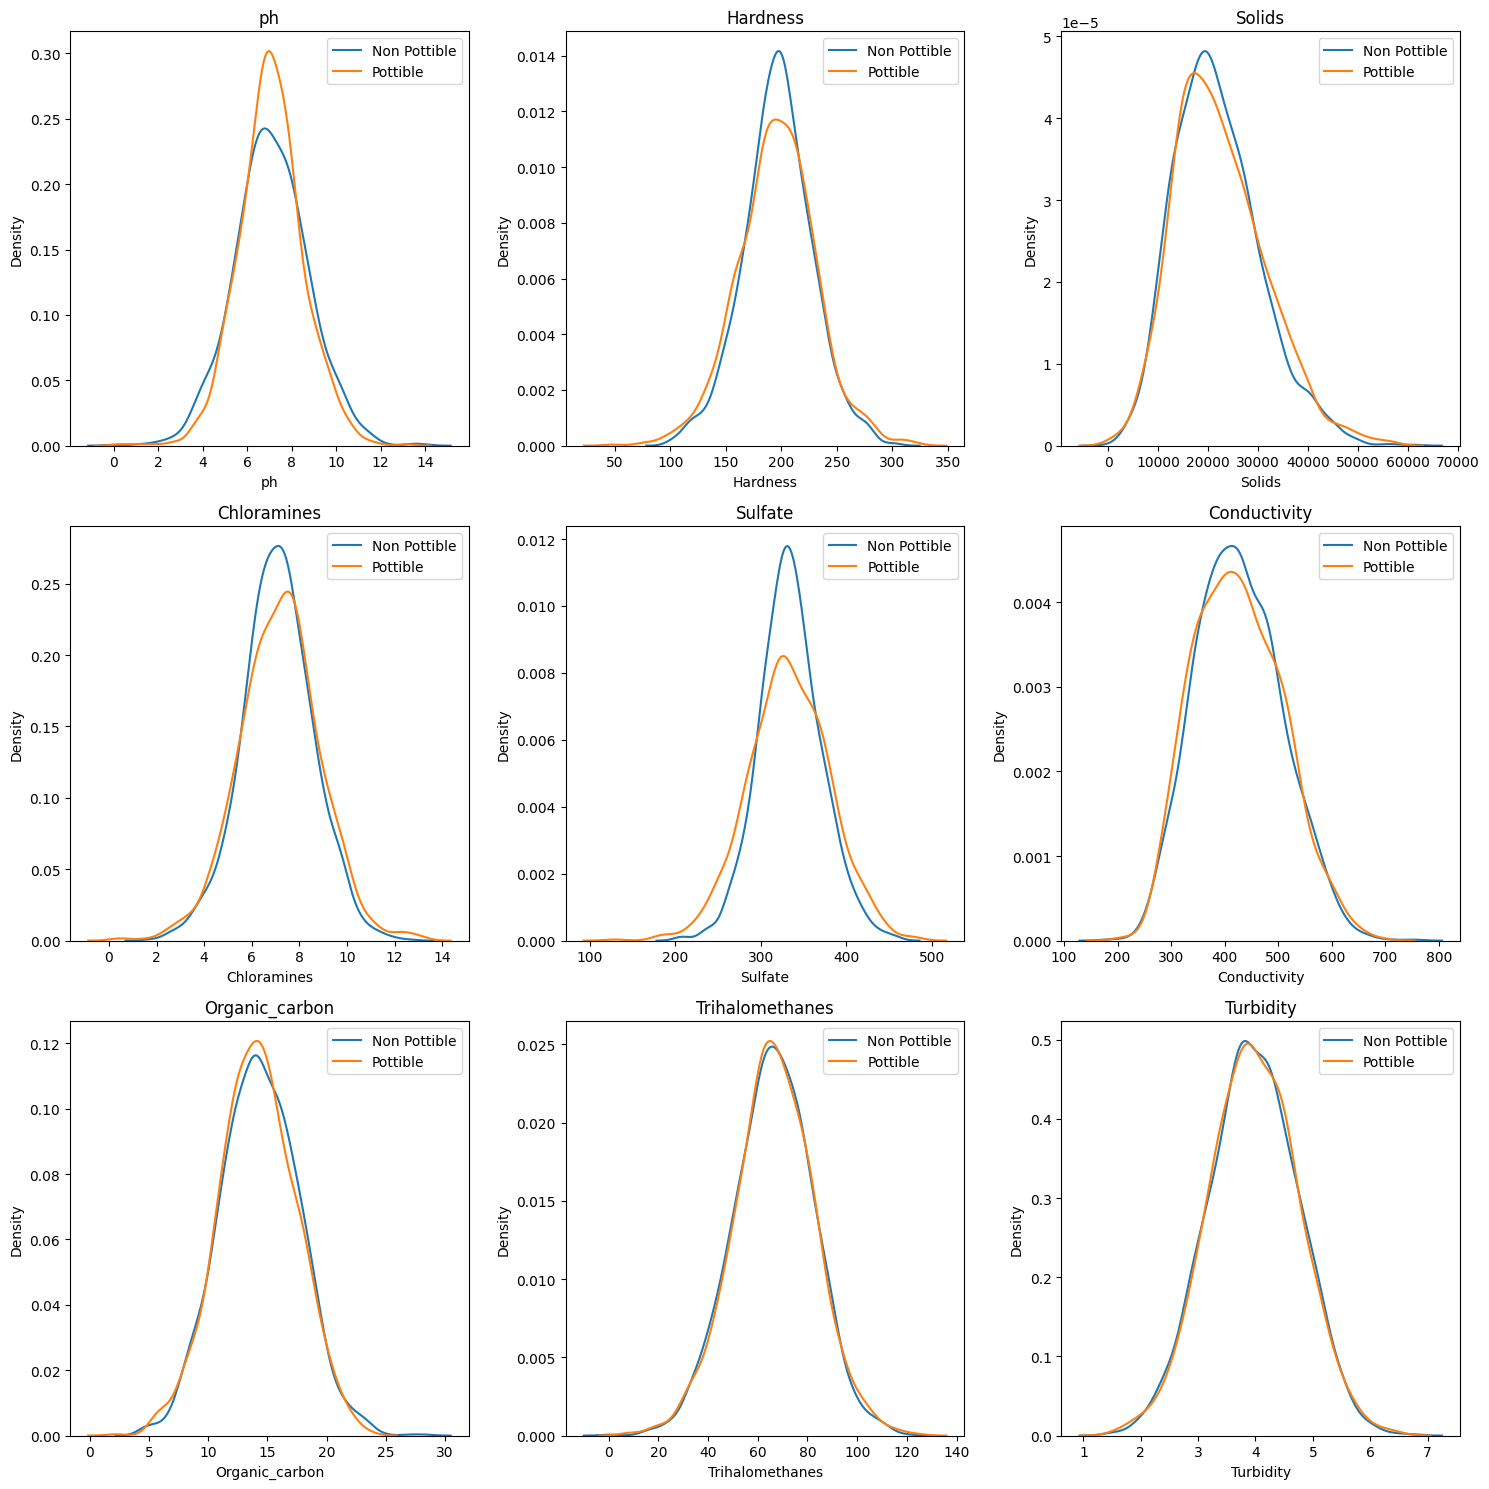

In [298]:
non_pottible = df[df['Potability'] == 0]
pottible = df[df['Potability'] == 1]

plt.figure(figsize=(15,15))

for ax,col in enumerate(df.columns[:9]):
    plt.subplot(3,3,ax+1)
    plt.title(col)
    sns.kdeplot(x=non_pottible[col],label = "Non Pottible")
    sns.kdeplot(x=pottible[col],label = "Pottible")
    plt.legend()
    
plt.tight_layout()

# Preprocessing

## Missing Value Problem

/Users/hoanganh/opt/anaconda3/envs/test/lib/python3.7/site-packages/missingno/missingno.py:73: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax0.grid(b=False)
/Users/hoanganh/opt/anaconda3/envs/test/lib/python3.7/site-packages/missingno/missingno.py:142: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=False)


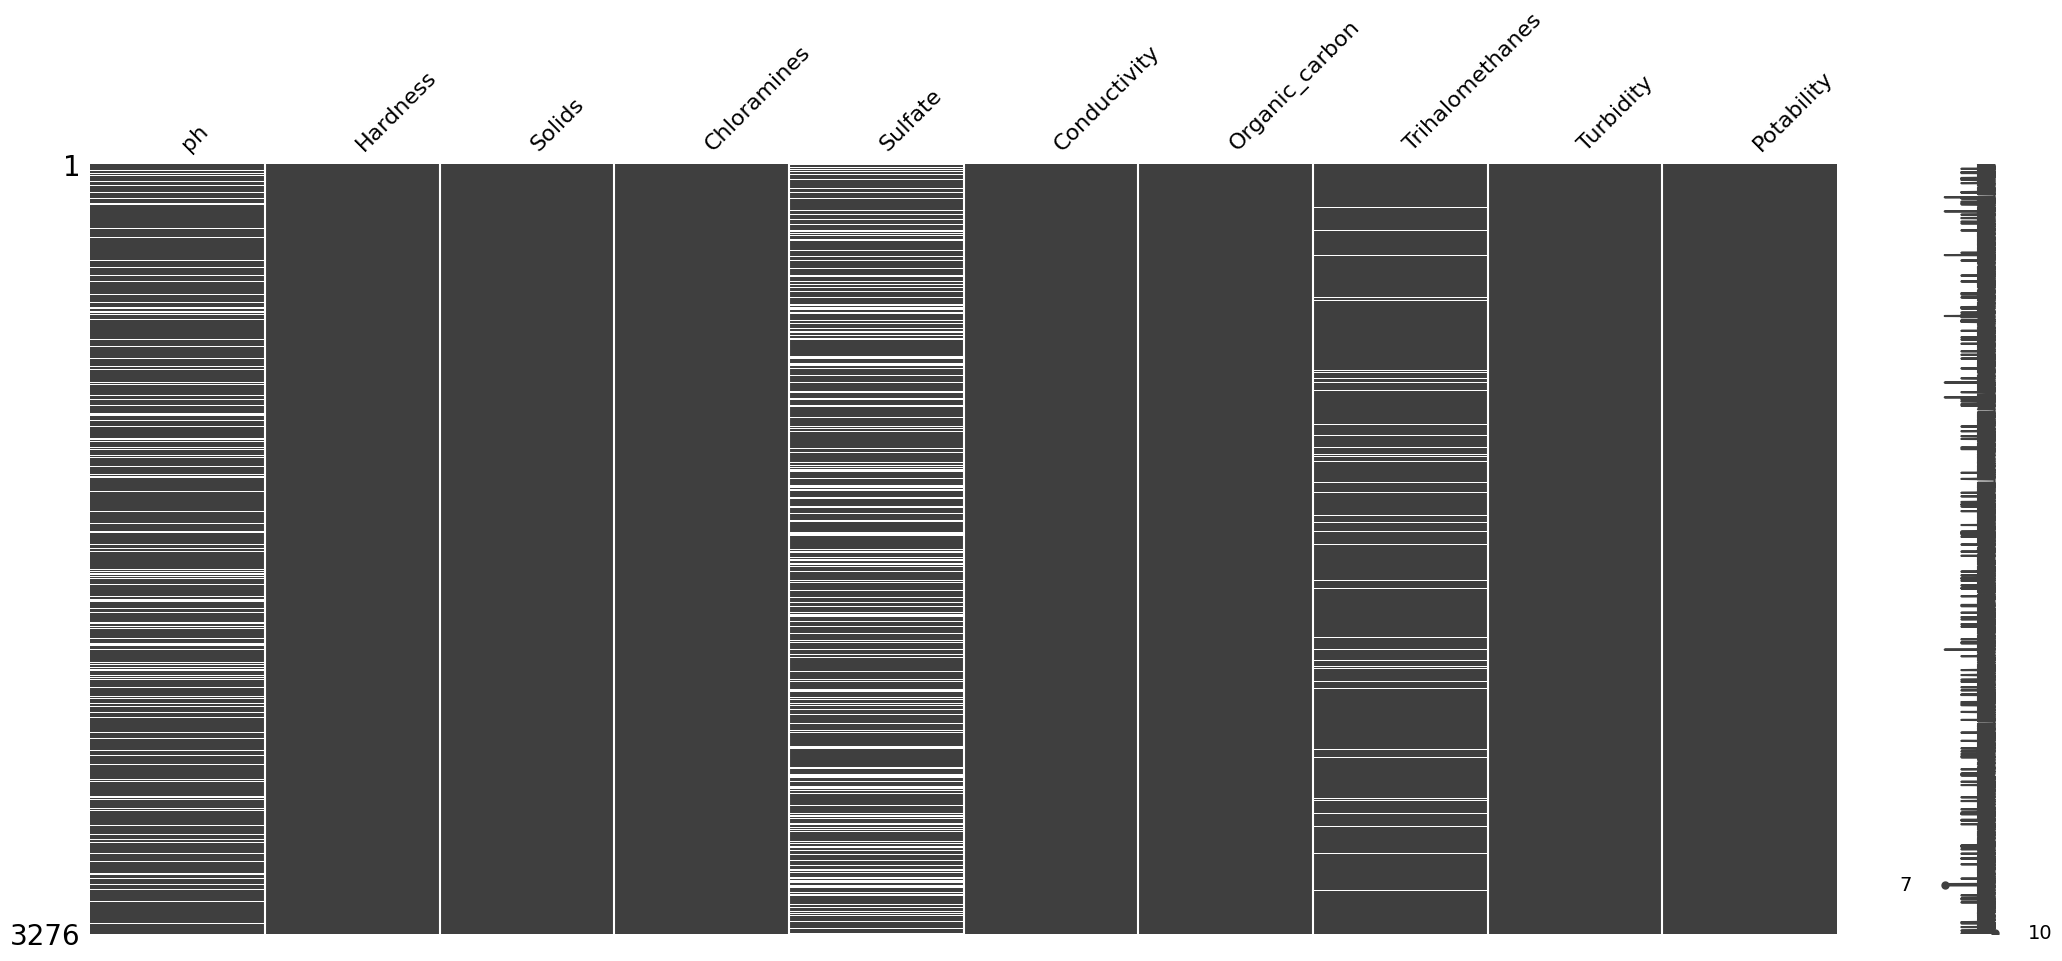

In [299]:
msno.matrix(df)
plt.show()

In [300]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [301]:
df["ph"].fillna(value = df["ph"].mean(), inplace = True)
df["Sulfate"].fillna(value = df["Sulfate"].mean(), inplace = True)
df["Trihalomethanes"].fillna(value = df["Trihalomethanes"].mean(), inplace = True)

In [302]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## Train-Test Split and Normalization

In [303]:
X =  df.drop("Potability",axis=1).values
y=   df['Potability'].values

In [304]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state = 42)

In [305]:
print("x - train shape:",X_train.shape)
print("x - test shape:",X_test.shape)
print("y - train shape:",y_train.shape)
print("y - test shape:",y_test.shape)

x - train shape: (2194, 9)
x - test shape: (1082, 9)
y - train shape: (2194,)
y - test shape: (1082,)


In [306]:
# min-max normalization
x_train_max = np.max(X_train)
x_train_min = np.min(X_train)
X_train = (X_train - x_train_min)/(x_train_max-x_train_min)
X_test = (X_test - x_train_min)/(x_train_max-x_train_min)

# Modelling

## Decision Tree and Random Forest Classifiers

In [307]:
models = [("DTC", DecisionTreeClassifier()),
          ("RF",RandomForestClassifier()),
          ("SVM", SVC(kernel="linear"))
          ]

In [308]:
finalResults = []
cmList = []
for name, model in models:
    model.fit(X_train, y_train) # train
    model_result = model.predict(X_test) # prediction
    score = accuracy_score(y_test, model_result)
    cm = confusion_matrix(y_test, model_result)
    finalResults.append((name, score))
    cmList.append((name, cm))
finalResults

[('DTC', 0.5841035120147874),
 ('RF', 0.6940850277264325),
 ('SVM', 0.6284658040665434)]

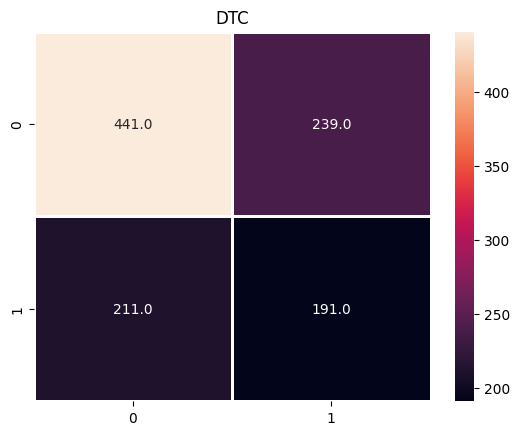

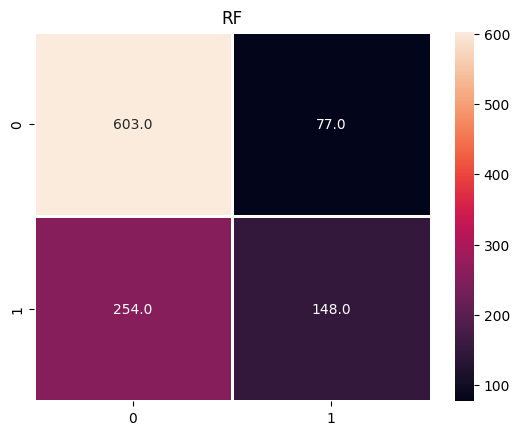

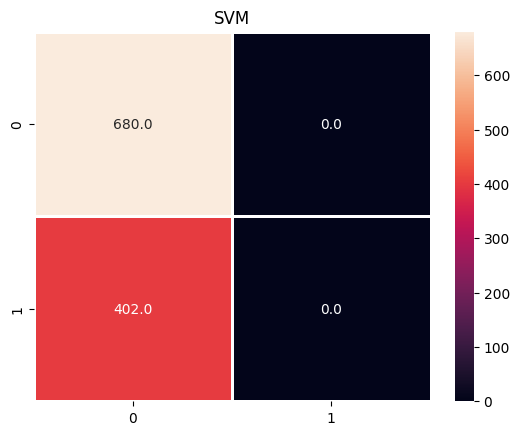

In [309]:
for name, i in cmList:
    plt.figure()
    sns.heatmap(i, annot = True, linewidths = 0.8, fmt = ".1f")
    plt.title(name)
    plt.show()

# Decision Tree Hyperparameter Tuning

In [310]:
dt = DecisionTreeClassifier(random_state=42)

In [311]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10],
    'min_samples_leaf': [1, 3, 5, 10, 20, 50, 100],
    'min_samples_split': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [312]:
def my_custom_loss_func(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[1, 0]

scorer_custom = make_scorer(my_custom_loss_func, greater_is_better=False)
scorer_accuracy = make_scorer(accuracy_score)
scorer = {
    "custom" : scorer_custom,
    "accuracy_scr" : scorer_accuracy
}

In [313]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=2, verbose=1, scoring=scorer,
                           refit="custom")

In [314]:
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 280 candidates, totalling 560 fits


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [1, 3, 5, 10, 20, 50, 100],
                         'min_samples_split': [5, 10, 20, 50, 100]},
             refit='custom',
             scoring={'accuracy_scr': make_scorer(accuracy_score),
                      'custom': make_scorer(my_custom_loss_func, greater_is_better=False)},
             verbose=1)

In [315]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50,
                       min_samples_split=5, random_state=42)

In [316]:
dt_best = grid_search.best_estimator_

Train Confusion Matrix:
              precision    recall  f1-score   support

           0       0.68      0.84      0.75      1318
           1       0.63      0.40      0.49       876

    accuracy                           0.67      2194
   macro avg       0.65      0.62      0.62      2194
weighted avg       0.66      0.67      0.65      2194



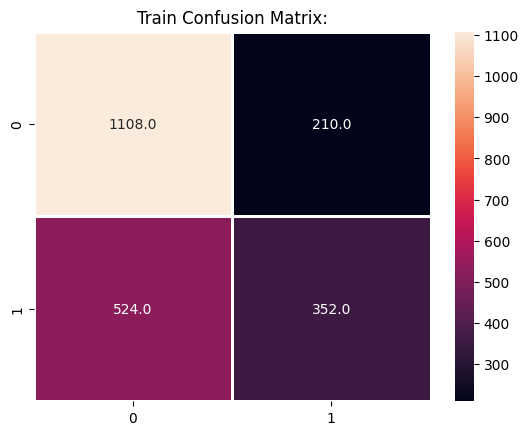

--------------------------------------------------
Test Confusion Matrix:
259
              precision    recall  f1-score   support

           0       0.68      0.81      0.74       680
           1       0.53      0.36      0.42       402

    accuracy                           0.64      1082
   macro avg       0.60      0.58      0.58      1082
weighted avg       0.62      0.64      0.62      1082



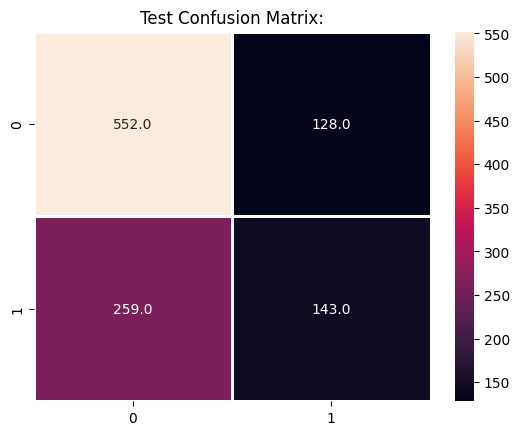

In [317]:
def evaluate_model(dt_classifier):
    print("Train Confusion Matrix:")
    cf_matrix_train = confusion_matrix(y_train, dt_classifier.predict(X_train))
    print(classification_report(y_train, dt_classifier.predict(X_train)))
    plt.figure()
    sns.heatmap(cf_matrix_train, annot = True, linewidths = 0.8, fmt = ".1f")
    plt.title("Train Confusion Matrix:")
    plt.show()
    print("-"*50)

    print("Test Confusion Matrix:")
    cf_matrix_test = confusion_matrix(y_test, dt_classifier.predict(X_test))
    print(cf_matrix_test[1, 0])
    print(classification_report(y_test, dt_classifier.predict(X_test)))
    plt.figure()
    sns.heatmap(cf_matrix_test, annot = True, linewidths = 0.8, fmt = ".1f")
    plt.title("Test Confusion Matrix:")
    plt.show()

evaluate_model(dt_best)